In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\daily-power-generation.csv")
df1 = pd.read_csv(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\daily-renewable-energy-generation.csv")
df2 = pd.read_csv(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\energy-requirement-and-availabililty.csv")

In [8]:
df1.head(2)

,date,state_name,state_code,region,wind_energy,solar_energy,other_renewable_energy,total_renewable_energy
0,2020-01-01,Chandigarh,4,Northern Region,0.0,0.0,0.00,0.00
1,2020-01-01,Delhi,7,Northern Region,0.0,0.0,0.58,0.58


In [9]:
df2.head(2)

,month,state_name,state_code,energy_requirement,energy_availability
0,2020-01-01,Chandigarh,4.0,137.98,137.98
1,2020-01-01,Lakshadweep,31.0,3.85,3.85


In [10]:
import matplotlib.pyplot as plt 

In [11]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(2452625, 11)
(59985, 8)
(1491, 5)


In [15]:
df['station_type'].unique()

array(['Thermal', 'Ther (Gt)', 'Hydro', 'Nuclear', 'Ther (Dg)'],
      dtype=object)

In [16]:
df['state_name'].nunique()

34

In [17]:
df['power_station'].nunique()

580

In [18]:
df['power_station'].nunique()

580

In [19]:
df['power_station_unit'].unique()

array(['Unit 1', 'Unit 2', 'Single Unit', 'Unit 3', 'Unit 4', 'Unit 5',
       'Unit 6', 'Unit 7', 'Unit 8', 'Unit 9', 'Unit 10', 'Unit 11',
       'Unit 12', 'Unit 13', 'Unit 15', 'Unit 16', 'Unit 14'],
      dtype=object)

In [20]:
df['sector'].unique()

array(['State', 'Private', 'Central'], dtype=object)

In [21]:
df_region = df.groupby('region')
df_state  = df.groupby('state_name')
df_sector = df.groupby('sector')

In [22]:
df_sector_state = df.groupby(['state_name','sector'])

In [23]:
df_sector = df.groupby('station_type')

In [24]:
df.groupby(['state_name'])['power_station'].nunique().sort_values(ascending=False)

state_name
Tamil Nadu                     62
Maharashtra                    49
Himachal Pradesh               37
Gujarat                        37
Chhatisgarh                    33
Uttar Pradesh                  31
Madhya Pradesh                 29
Andhra Pradesh                 29
Uttarakhand                    28
Karnataka                      28
West Bengal                    27
Rajasthan                      24
Odisha                         21
Kerala                         19
Telangana                      19
Punjab                         18
Jharkhand                      16
Jammu And Kashmir              13
Bihar                          11
Assam                           9
Sikkim                          9
Haryana                         6
Delhi                           6
Meghalaya                       6
Tripura                         5
Arunachal Pradesh               4
Andaman And Nicobar Islands     2
Manipur                         2
Ladakh                          2
Pud

In [62]:
df_p1 = (
    df.groupby(['state_name', 'station_type'])['power_station']
    .nunique()
    .reset_index()
    .pivot_table(index='state_name', columns='station_type', values='power_station', aggfunc='sum', fill_value=0)
)

In [63]:
df_p1.loc['Total'] = df_p1.sum(numeric_only=True, axis=0)

In [64]:
df_p1.sort_values(by='Hydro', ascending = False)

station_type,Hydro,Nuclear,Ther (Dg),Ther (Gt),Thermal
state_name,,,,,
Total,249,8,12,69,249
Himachal Pradesh,37,0,0,0,0
Tamil Nadu,31,2,3,7,19
Uttarakhand,24,0,0,4,0
Maharashtra,16,1,0,4,28
Karnataka,16,1,2,1,8
Kerala,15,0,2,2,0
Madhya Pradesh,13,0,0,0,16
Jammu And Kashmir,12,0,0,1,0


In [109]:
df_p1 = df_p1.drop('Total')

In [115]:
e1=df_p1['Hydro']

<Axes: ylabel='state_name'>

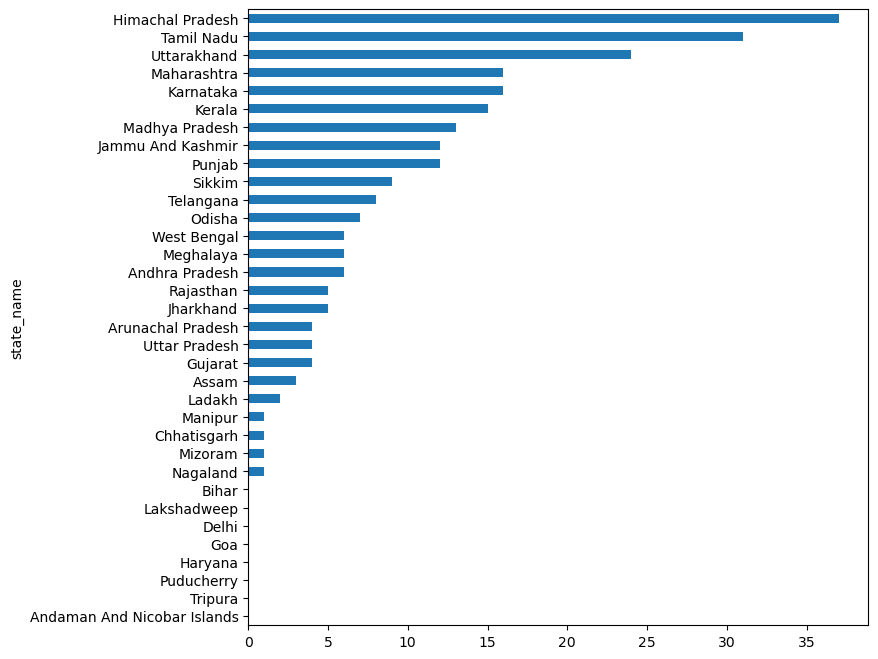

In [128]:
e1.sort_values().plot.barh(figsize=(8,8))

In [129]:
e2=df_p1['Thermal']

<Axes: ylabel='state_name'>

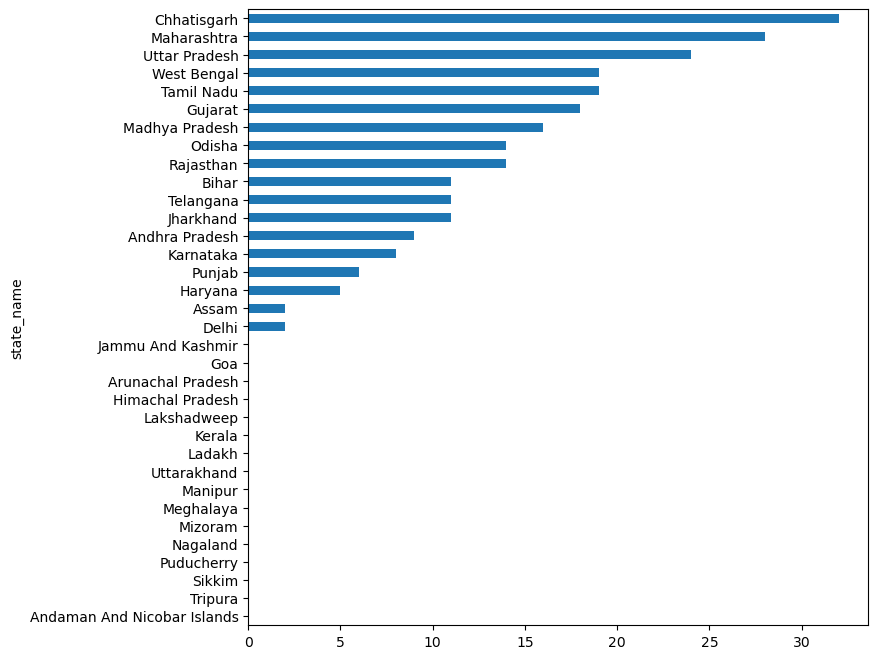

In [130]:
e2.sort_values().plot.barh(figsize=(8,8))

In [28]:
df.head(2)

,date,region,state_name,state_code,sector,station_type,power_station,power_station_unit,monitored_capacity,todays_gen_prgm,todays_gen_act
0,2017-09-01,Northern,Delhi,7.0,State,Thermal,Rajghat Tps,Unit 1,67.5,0.0,0.0
1,2017-09-01,Northern,Delhi,7.0,State,Thermal,Rajghat Tps,Unit 2,67.5,0.0,0.0


In [29]:
df_p2 = df.groupby(['state_name','power_station_unit'])['power_station'].nunique().reset_index().pivot_table(index='state_name',columns='power_station_unit',
                                                                                                          values = 'power_station',aggfunc='sum',
                                                                                                          fill_value=0)


In [30]:
df_p2['Total'] = df_p2.sum(numeric_only=True, axis=1)

In [31]:
df_p2.loc['Total'] = df_p2.sum(numeric_only=True, axis=0)

In [34]:
df_p2

power_station_unit,Single Unit,Unit 1,Unit 10,Unit 11,Unit 12,Unit 13,Unit 14,Unit 15,Unit 16,Unit 2,Unit 3,Unit 4,Unit 5,Unit 6,Unit 7,Unit 8,Unit 9,Total
state_name,,,,,,,,,,,,,,,,,,
Andaman And Nicobar Islands,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Andhra Pradesh,20,9,0,0,0,0,0,0,0,9,6,5,2,2,1,1,0,55
Arunachal Pradesh,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Assam,7,2,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,12
Bihar,0,9,0,0,0,0,0,0,0,9,7,6,3,2,2,1,1,40
Chhatisgarh,1,32,0,0,0,0,0,0,0,25,8,8,3,1,1,0,0,79
Delhi,4,2,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,11
Goa,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Gujarat,18,15,0,0,0,0,0,1,1,15,13,12,8,6,5,5,4,103


In [35]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [36]:
state = df.groupby('state_name')

In [38]:
state.describe()

state_code                                     \
                                 count  mean  std   min   25%   50%   75%   
state_name                                                                  
Andaman And Nicobar Islands    3307.00 35.00 0.00 35.00 35.00 35.00 35.00   
Andhra Pradesh               138811.00 28.00 0.00 28.00 28.00 28.00 28.00   
Arunachal Pradesh              8272.00 12.00 0.00 12.00 12.00 12.00 12.00   
Assam                         25067.00 18.00 0.00 18.00 18.00 18.00 18.00   
Bihar                         64929.00 10.00 0.00 10.00 10.00 10.00 10.00   
Chhatisgarh                  184658.00 22.00 0.00 22.00 22.00 22.00 22.00   
Delhi                         14925.00  7.00 0.00  7.00  7.00  7.00  7.00   
Goa                            2550.00 30.00 0.00 30.00 30.00 30.00 30.00   
Gujarat                      175925.00 24.00 0.00 24.00 24.00 24.00 24.00   
Haryana                       34075.00  6.00 0.00  6.00  6.00  6.00  6.00   
Himachal Pradesh              79074.00  2.00 0.00  2.00  2.00  2.00  2.00   
Jammu And Kashmir             29786.00  1.00 0.00  1.00  1.00  1.00  1.00   
Jharkhand                     52762.00 20.00 0.00 20.00 20.00 20.00 20.00   
Karnataka                    112915.00 29.00 0.00 29.00 29.00 29.00 29.00   
Kerala                        47060.00 32.00 0.00 32.00 32.00 32.00 32.00   
Ladakh                         3364.00 37.00 0.00 37.00 37.00 37.00 37.00   
Lakshadweep                     690.00 31.00 0.00 31.00 31.00 31.00 31.00   
Madhya Pradesh               151841.00 23.00 0.00 23.00 23.00 23.00 23.00   
Maharashtra                  251630.00 27.00 0.00 27.00 27.00 27.00 27.00   
Manipur                        5100.00 14.00 0.00 14.00 14.00 14.00 14.00   
Meghalaya                     13194.00 17.00 0.00 17.00 17.00 17.00 17.00   
Mizoram                        2550.00 15.00 0.00 15.00 15.00 15.00 15.00   
Nagaland                       2550.00 13.00 0.00 13.00 13.00 13.00 13.00   
Odisha                        88580.00 21.00 0.00 21.00 21.00 21.00 21.00   
Puducherry                     2550.00 34.00 0.00 34.00 34.00 34.00 34.00   
Punjab                        63151.00  3.00 0.00  3.00  3.00  3.00  3.00   
Rajasthan                    127665.00  8.00 0.00  8.00  8.00  8.00  8.00   
Sikkim                        19495.00 11.00 0.00 11.00 11.00 11.00 11.00   
Tamil Nadu                   215945.00 33.00 0.00 33.00 33.00 33.00 33.00   
Telangana                     77129.00 36.00 0.00 36.00 36.00 36.00 36.00   
Tripura                       12750.00 16.00 0.00 16.00 16.00 16.00 16.00   
Uttar Pradesh                223737.00  9.00 0.00  9.00  9.00  9.00  9.00   
Uttarakhand                   56098.00  5.00 0.00  5.00  5.00  5.00  5.00   
West Bengal                  160490.00 19.00 0.00 19.00 19.00 19.00 19.00   

                                  monitored_capacity         ...  \
                              max              count   mean  ...   
state_name                                                   ...   
Andaman And Nicobar Islands 35.00            3307.00  42.94  ...   
Andhra Pradesh              28.00          138811.00 335.43  ...   
Arunachal Pradesh           12.00            8272.00 265.47  ...   
Assam                       18.00           25067.00 167.65  ...   
Bihar                       10.00           64929.00 280.86  ...   
Chhatisgarh                 22.00          184658.00 324.03  ...   
Delhi                        7.00           14925.00 404.23  ...   
Goa                         30.00            2550.00  48.00  ...   
Gujarat                     24.00          175925.00 378.40  ...   
Haryana                      6.00           34075.00 436.87  ...   
Himachal Pradesh             2.00           79074.00 321.97  ...   
Jammu And Kashmir            1.00           29786.00 302.96  ...   
Jharkhand                   20.00           52762.00 235.28  ...   
Karnataka                   29.00          112915.00 316.74  ...   
Kerala                

In [40]:
state.nunique()

,date,region,state_code,sector,station_type,power_station,power_station_unit,monitored_capacity,todays_gen_prgm,todays_gen_act
state_name,,,,,,,,,,
Andaman And Nicobar Islands,2550,1,1,2,1,2,1,3,25,4
Andhra Pradesh,2550,1,1,3,4,29,9,26,715,1677
Arunachal Pradesh,2550,1,1,1,1,4,1,7,168,1081
Assam,2550,1,1,2,3,9,4,16,309,619
Bihar,2550,1,1,2,1,11,9,8,522,1573
Chhatisgarh,2550,1,1,3,2,33,8,18,849,1953
Delhi,2550,1,1,3,2,6,6,8,202,1189
Goa,2550,1,1,1,1,1,1,1,1,1
Gujarat,2550,1,1,3,4,37,12,32,926,2346


In [41]:
df_p3=df.groupby(['state_name','power_station']).agg (
    {
        'power_station': 'nunique',
        'power_station_unit': 'nunique',
        'sector': 'first',
        'todays_gen_prgm': 'sum',
        'todays_gen_act': 'sum'
    }
)
df_p3.head()

power_station  \
state_name                  power_station                              
Andaman And Nicobar Islands And. Nicobar Dg                        1   
                            And. Nicobar Pvt. Dg                   1   
Andhra Pradesh              Damodaram Sanjeevaiah Tps              1   
                            Dr. N.Tata Rao Tps                     1   
                            Gautami Ccpp                           1   

                                                       power_station_unit  \
state_name                  power_station                                   
Andaman And Nicobar Islands And. Nicobar Dg                             1   
                            And. Nicobar Pvt. Dg                        1   
Andhra Pradesh              Damodaram Sanjeevaiah Tps                   3   
                            Dr. N.Tata Rao Tps                          8   
                            Gautami Ccpp                                1   

                                                        sector  \
state_name                  power_station                        
Andaman And Nicobar Islands And. Nicobar Dg              State   
                            And. Nicobar Pvt. Dg       Private   
Andhra Pradesh              Damodaram Sanjeevaiah Tps    State   
                            Dr. N.Tata Rao Tps           State   
                            Gautami Ccpp               Private   

                                                       todays_gen_prgm  \
state_name                  power_station                                
Andaman And Nicobar Islands And. Nicobar Dg                    1009.36   
                            And. Nicobar Pvt. Dg                194.20   
Andhra Pradesh              Damodaram Sanjeevaiah Tps         68050.93   
                            Dr. N.Tata Rao Tps                92246.56   
                            Gautami Ccpp                          0.00   

                                                       todays_gen_act  
state_name                  power_station                              
Andaman And Nicobar Islands And. Nicobar Dg                    894.81  
                            And. Nicobar Pvt. Dg               429.00  
Andhra Pradesh              Damodaram Sanjeevaiah Tps        51177.21  
                            Dr. N.Tata Rao Tps               78019.41  
                            Gautami Ccpp                         0.00

In [57]:
df_p3

power_station  \
state_name                  power_station                              
Andaman And Nicobar Islands And. Nicobar Dg                        1   
                            And. Nicobar Pvt. Dg                   1   
Andhra Pradesh              Damodaram Sanjeevaiah Tps              1   
                            Dr. N.Tata Rao Tps                     1   
                            Gautami Ccpp                           1   
...                                                              ...   
West Bengal                 Santaldih Tps                          1   
                            Southern Repl. Tps                     1   
                            Teesta Low Dam-Iii Hps                 1   
                            Teesta Low Dam-Iv Hps                  1   
                            Titagarh Tps                           1   

                                                       power_station_unit  \
state_name                  power_station                                   
Andaman And Nicobar Islands And. Nicobar Dg                             1   
                            And. Nicobar Pvt. Dg                        1   
Andhra Pradesh              Damodaram Sanjeevaiah Tps                   3   
                            Dr. N.Tata Rao Tps                          8   
                            Gautami Ccpp                                1   
...                                                                   ...   
West Bengal                 Santaldih Tps                               2   
                            Southern Repl. Tps                          2   
                            Teesta Low Dam-Iii Hps                      1   
                            Teesta Low Dam-Iv Hps                       1   
                            Titagarh Tps                                4   

                                                        sector  \
state_name                  power_station                        
Andaman And Nicobar Islands And. Nicobar Dg            Central   
                            And. Nicobar Pvt. Dg       Central   
Andhra Pradesh              Damodaram Sanjeevaiah Tps  Central   
                            Dr. N.Tata Rao Tps         Central   
                            Gautami Ccpp               Central   
...                                                        ...   
West Bengal                 Santaldih Tps              Central   
                            Southern Repl. Tps         Central   
                            Teesta Low Dam-Iii Hps     Central   
                            Teesta Low Dam-Iv Hps      Central   
                            Titagarh Tps               Central   

                                                       todays_gen_prgm  \
state_name                  power_station                                
Andaman And Nicobar Islands And. Nicobar Dg                    1009.36   
                            And. Nicobar Pvt. Dg                194.20   
Andhra Pradesh              Damodaram Sanjeevaiah Tps         68050.93   
                            Dr. N.Tata Rao Tps                92246.56   
                            Gautami Ccpp                          0.00   
...                                                                ...   
West Bengal                 Santaldih Tps                     24986.81   
                            Southern Repl. Tps                 2260.51   
                            Teesta Low Dam-Iii Hps             3919.25   
                            Teesta Low Dam-Iv Hps              5141.29   
                            Titagarh Tps                          0.00   

                                                       todays_gen_act  
state_name                  power_station                              
Andaman And Nicobar Islands And. Nicobar Dg                    894.81  
                            And. Nicobar Pvt. Dg               429.00  
Andhra

In [53]:
df.groupby('sector')['power_station'].nunique()

sector
Central    133
Private    175
State      282
Name: power_station, dtype: int64

In [61]:
df_p4=df.groupby(['sector']).agg (
    {
        'power_station': 'nunique',
        'power_station_unit': 'nunique',
        'todays_gen_prgm': 'sum',
        'todays_gen_act': 'sum'
    }
)
df_p4.head()

,power_station,power_station_unit,todays_gen_prgm,todays_gen_act
sector,,,,
Central,133,14,3544869.21,3564812.42
Private,175,12,2873965.85,2850912.78
State,282,15,3223109.51,2973244.96


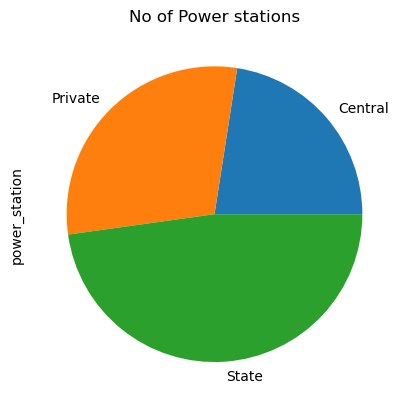

In [147]:
df_p4['power_station'].plot.pie()
plt.title('No of Power stations')
plt.show()

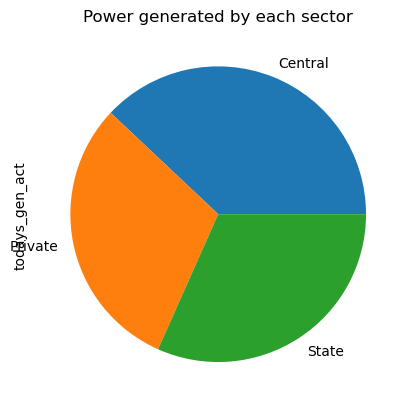

In [146]:
df_p4['todays_gen_act'].plot.pie()
plt.title('Power generated by each sector')
plt.show()

In [66]:
df.head(2)

,date,region,state_name,state_code,sector,station_type,power_station,power_station_unit,monitored_capacity,todays_gen_prgm,todays_gen_act
0,2017-09-01,Northern,Delhi,7.00,State,Thermal,Rajghat Tps,Unit 1,67.50,0.00,0.00
1,2017-09-01,Northern,Delhi,7.00,State,Thermal,Rajghat Tps,Unit 2,67.50,0.00,0.00


In [76]:
df_p5=df.groupby(['state_name','sector']).nunique().reset_index().pivot_table(index='state_name',columns='sector',
                                                                              values='power_station',aggfunc='sum',fill_value=0)

In [75]:
df_p5.sort_values(by='Central',ascending=False)

sector,Central,Private,State
state_name,,,
Himachal Pradesh,17,10,14
Uttar Pradesh,11,9,11
Bihar,11,0,1
Tamil Nadu,10,12,40
West Bengal,8,8,11
Jharkhand,8,4,4
Jammu And Kashmir,8,0,5
Uttarakhand,7,8,13
Madhya Pradesh,7,8,15


<Axes: ylabel='state_name'>

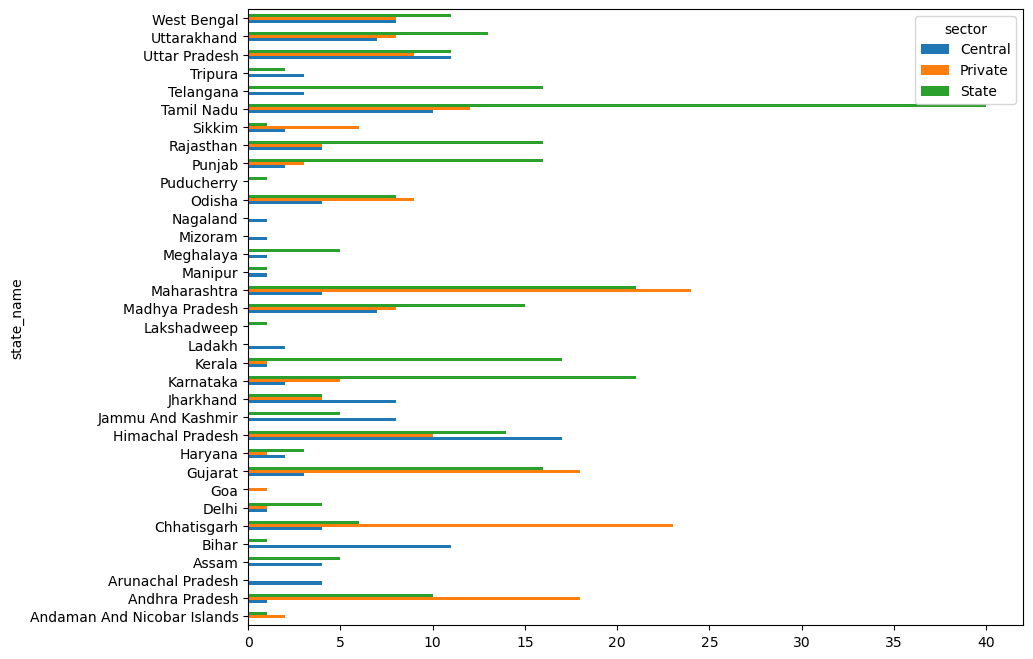

In [136]:
df_p5.plot.barh(figsize=(10,8))

In [78]:
df.head(2)

,date,region,state_name,state_code,sector,station_type,power_station,power_station_unit,monitored_capacity,todays_gen_prgm,todays_gen_act
0,2017-09-01,Northern,Delhi,7.00,State,Thermal,Rajghat Tps,Unit 1,67.50,0.00,0.00
1,2017-09-01,Northern,Delhi,7.00,State,Thermal,Rajghat Tps,Unit 2,67.50,0.00,0.00


In [80]:
df.sort_values(by='date')

,date,region,state_name,state_code,sector,station_type,power_station,power_station_unit,monitored_capacity,todays_gen_prgm,todays_gen_act
0,2017-09-01,Northern,Delhi,7.00,State,Thermal,Rajghat Tps,Unit 1,67.50,0.00,0.00
642,2017-09-01,Southern,Karnataka,29.00,Private,Thermal,Udupi Tpp,Unit 1,600.00,0.00,0.00
643,2017-09-01,Southern,Karnataka,29.00,Private,Thermal,Udupi Tpp,Unit 2,600.00,11.77,13.61
644,2017-09-01,Southern,Karnataka,29.00,Private,Ther (Dg),Bellary Dg,Single Unit,25.20,0.00,0.00
645,2017-09-01,Southern,Karnataka,29.00,Central,Thermal,Kudgi Stpp,Unit 1,800.00,3.57,14.77
...,...,...,...,...,...,...,...,...,...,...,...
2451989,2024-11-11,Western,Gujarat,24.00,State,Thermal,Gandhi Nagar Tps,Unit 3,210.00,3.00,0.00
2451990,2024-11-11,Western,Gujarat,24.00,State,Thermal,Gandhi Nagar Tps,Unit 4,210.00,2.87,0.00
2451991,2024-11-11,Western,Gujarat,24.00,State,Thermal,Gandhi Nagar Tps,Unit 5,210.00,3.53,3.03
2451902,2024-11-11,Northern,Uttar Pradesh,9.00,Central,Thermal,Tanda Tps,Unit 5,660.00,12.87,5.17


In [99]:
df_p7=df.groupby('state_name').agg(
    {
        'todays_gen_prgm':'sum',
        'todays_gen_act':'sum'
    }
)
df_p7.sort_values(by='todays_gen_act',ascending=False)

,todays_gen_prgm,todays_gen_act
state_name,,
Uttar Pradesh,1020426.23,980805.50
Maharashtra,981979.23,960595.90
Chhatisgarh,912417.54,951627.74
Madhya Pradesh,924499.41,941096.66
Gujarat,698101.10,641697.64
Tamil Nadu,654028.81,592366.68
West Bengal,569276.00,586324.81
Andhra Pradesh,496839.19,446766.30
Rajasthan,459943.16,427008.32


In [101]:
df_p8=df.groupby('station_type').agg(
    {
        'todays_gen_prgm':'sum',
        'todays_gen_act':'sum'
    }
)
df_p8.sort_values(by='todays_gen_act',ascending=False)

,todays_gen_prgm,todays_gen_act
station_type,,
Thermal,8021866.17,7763493.76
Hydro,1012145.08,1030627.74
Nuclear,306256.06,310420.01
Ther (Gt),300411.91,282964.32
Ther (Dg),1265.35,1464.33


Text(0.5, 1.0, 'energy generated')

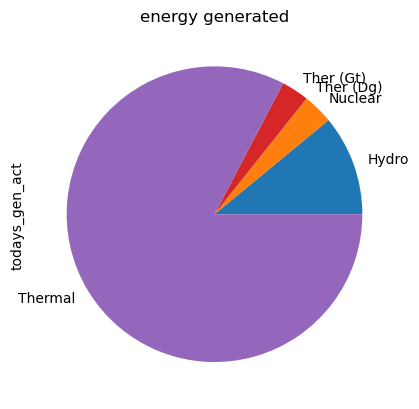

In [155]:
df_p8['todays_gen_act'].plot.pie()
plt.title('energy generated')

In [84]:
df_p6=df.groupby('date').agg(
    {
        'todays_gen_prgm':'sum',
        'todays_gen_act':'sum'
    }
)

In [85]:
df_p6

,todays_gen_prgm,todays_gen_act
date,,
2017-09-01,3463.59,3119.25
2017-09-02,3463.59,3151.28
2017-09-03,3463.45,3098.85
2017-09-04,3463.45,3307.26
2017-09-05,3476.53,3342.52
...,...,...
2024-11-07,4206.74,4095.64
2024-11-08,4202.64,4124.04
2024-11-09,4202.64,4122.92


In [148]:
import plotly.express as px
import plotly.graph_objects as go

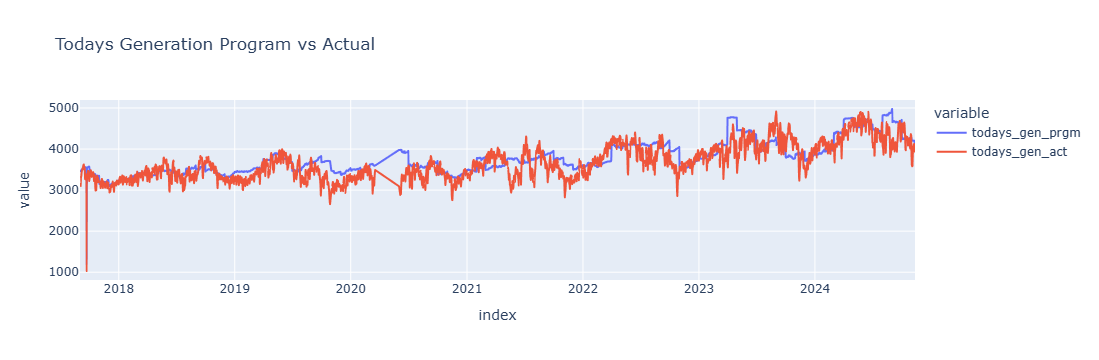

In [157]:
px.line(df_p6, x=df_p6.index, y=['todays_gen_prgm', 'todays_gen_act'],
              title='Todays Generation Program vs Actual')

In [156]:
df_p6.to_csv('df_p6.csv')